In [2]:
from google.colab import files
uploaded = files.upload()

Saving lstm.xlsx to lstm.xlsx


In [3]:
import pandas as pd
df = pd.read_excel('lstm.xlsx')
df.head()

,Date,GDPNOW,UNRATE,BOGZ1FL073161113Q,DFF,sales
0,2018-07-01,3.5537,3.8,2924.0,1.91,22497243.03
1,2018-08-01,NaN,3.8,NaN,1.91,26269264.06
2,2018-09-01,NaN,3.7,NaN,1.91,31518784.15
3,2018-10-01,1.8466,3.8,3041.0,2.18,39969147.05
4,2018-11-01,NaN,3.8,NaN,2.20,38335854.51


<Axes: title={'center': 'Sales Time Series'}>

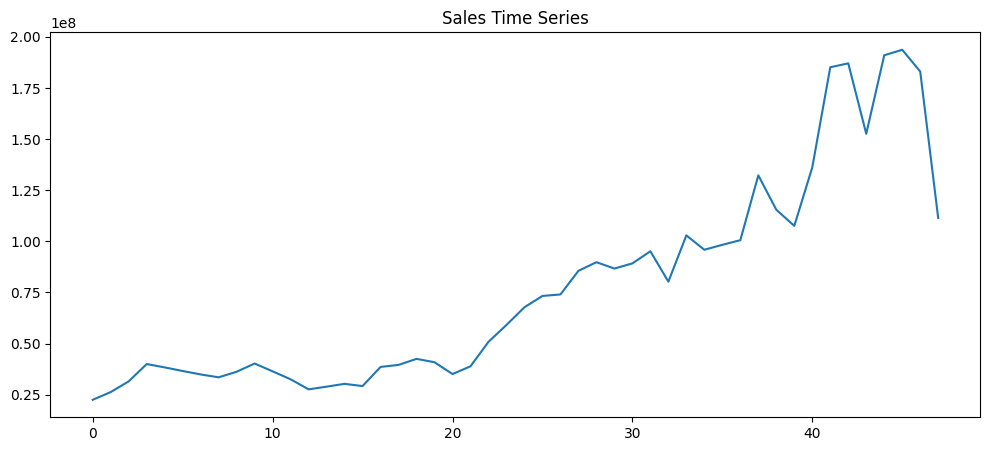

In [4]:
df['sales'].plot(figsize=(12, 5), title="Sales Time Series")

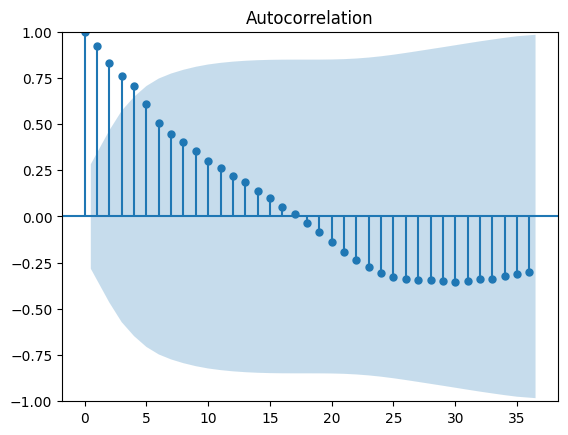

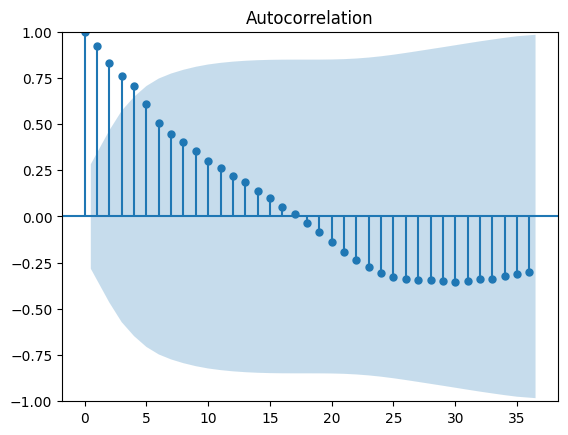

In [5]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['sales'].dropna(), lags=36)

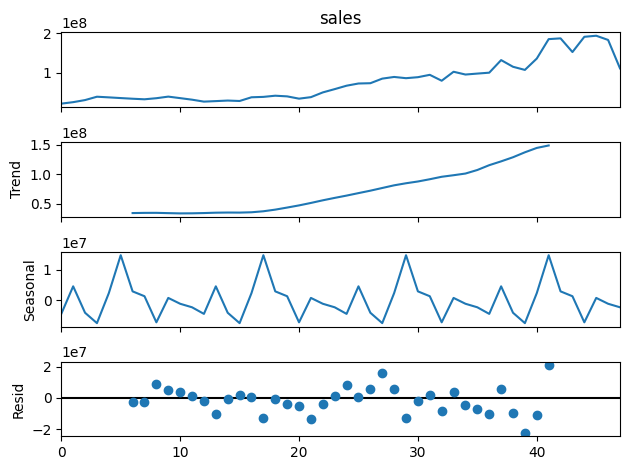

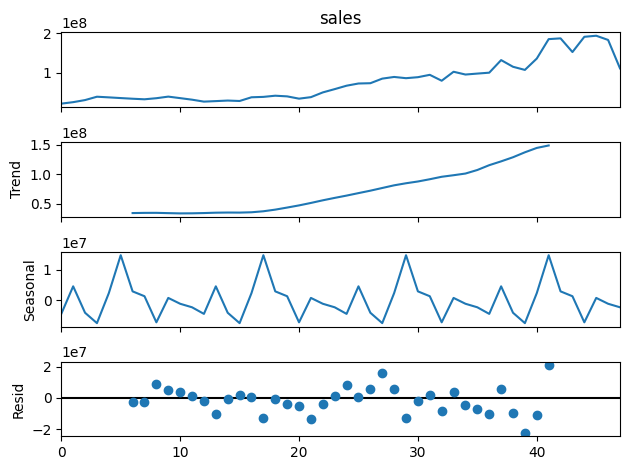

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['sales'], model='additive', period=12)
result.plot()

In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date').set_index('Date')

df = df.ffill().bfill()
df = df.asfreq('MS')

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas.tseries.frequencies import to_offset
y = df['sales']
exog = df.drop(columns=['sales'])

train_len = len(y)

future_dates = [df.index[-1] + to_offset(f"{i}M") for i in range(1, 13)]
future_exog = pd.DataFrame(np.repeat([exog.iloc[-1].values], 12, axis=0),
                           columns=exog.columns, index=future_dates)

/tmp/ipython-input-3785079783.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = [df.index[-1] + to_offset(f"{i}M") for i in range(1, 13)]


In [9]:
model = sm.tsa.SARIMAX(y, exog=exog, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [10]:
forecast = results.get_forecast(steps=12, exog=future_exog)
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

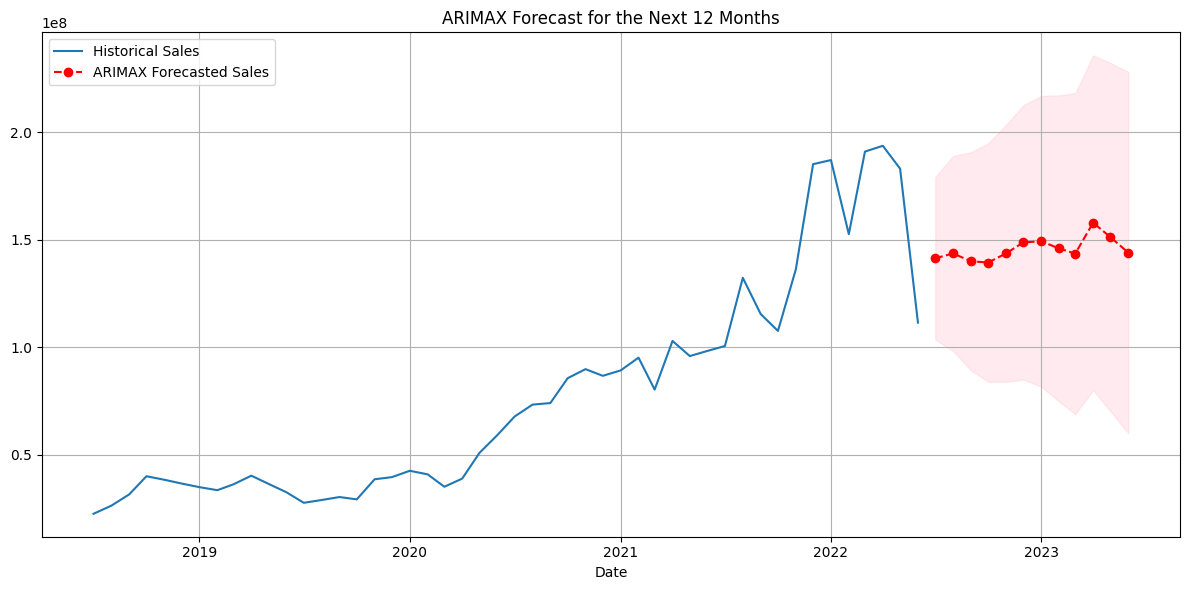

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(y, label='Historical Sales')
plt.plot(forecast_mean, label='ARIMAX Forecasted Sales', linestyle='--', marker='o', color='red')
plt.fill_between(forecast_mean.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title("ARIMAX Forecast for the Next 12 Months")
plt.xlabel("Date")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
in_sample_pred = results.fittedvalues

y_true = y[in_sample_pred.index]
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

rmse = np.sqrt(mean_squared_error(y_true, in_sample_pred))
mae = mean_absolute_error(y_true, in_sample_pred)
r2 = r2_score(y_true, in_sample_pred)

print(f"ARIMAX  RMSE: {rmse:.2f}")
print(f"ARIMAX  MAE : {mae:.2f}")
print(f"ARIMAX  R²  : {r2:.4f}")

ARIMAX  RMSE: 25959520.41
ARIMAX  MAE : 16536746.69
ARIMAX  R²  : 0.7343


In [ ]:
import pandas as pd

df = pd.read_csv('loans_head (1).csv')
df.head()

,observation_date,0,1,2,3,4,5,6,7,8,...,1050,1051,1052,1053,1054,1055,1056,1057,1058,1059
0,2018-07-01,6333.66,7876.36,16035.13,2691.49,105103.22,5183.47,383.76,42788.38,1400.06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2018-08-01,6333.66,0.00,16035.13,2691.49,0.00,5183.47,383.76,130043.67,9772.23,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2018-09-01,227405.98,0.00,16035.13,2691.49,0.00,5183.47,383.76,53967.57,9772.23,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2018-10-01,227405.98,0.00,16035.13,0.00,0.00,9686.10,383.76,53967.57,3168.60,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2018-11-01,94936.06,0.00,16035.13,0.00,0.00,1031.95,0.00,13168.75,153.82,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df['observation_date'] = pd.to_datetime(df['observation_date'])
df.set_index('observation_date', inplace=True)


total_balance = df.sum(axis=1)

ts = pd.DataFrame({'total_balance': total_balance})
ts.head()

,total_balance
observation_date,
2018-07-01,22497243.03
2018-08-01,26269264.06
2018-09-01,31518784.15
2018-10-01,39969147.05
2018-11-01,38335854.51


In [ ]:
import numpy as np
ts['log_total_balance'] = np.log(ts['total_balance'])
ts['log_diff'] = ts['log_total_balance'].diff()
ts[['log_total_balance', 'log_diff']].head()

,log_total_balance,log_diff
observation_date,,
2018-07-01,16.928903,NaN
2018-08-01,17.083910,0.155007
2018-09-01,17.266094,0.182184
2018-10-01,17.503618,0.237524
2018-11-01,17.461896,-0.041722


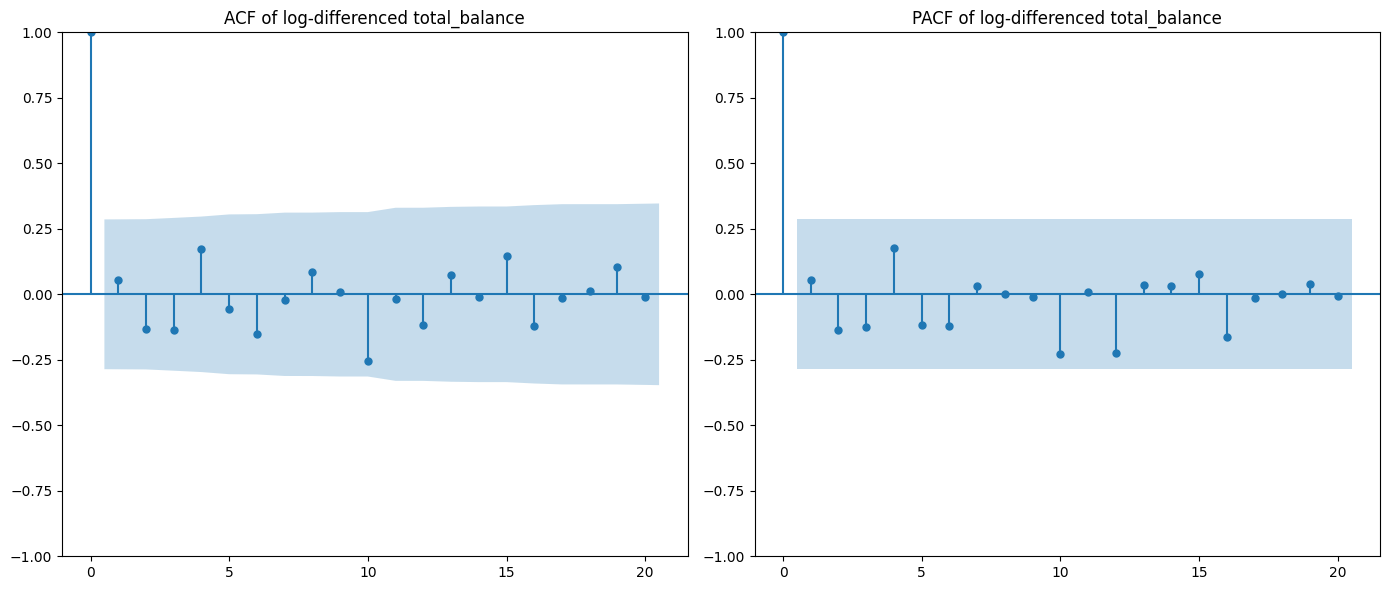

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(14, 6))

# ACF
plt.subplot(1, 2, 1)
plot_acf(ts['log_diff'].dropna(), lags=20, ax=plt.gca())
plt.title('ACF of log-differenced total_balance')

# PACF
plt.subplot(1, 2, 2)
plot_pacf(ts['log_diff'].dropna(), lags=20, ax=plt.gca(), method='ywm')
plt.title('PACF of log-differenced total_balance')

plt.tight_layout()
plt.show()

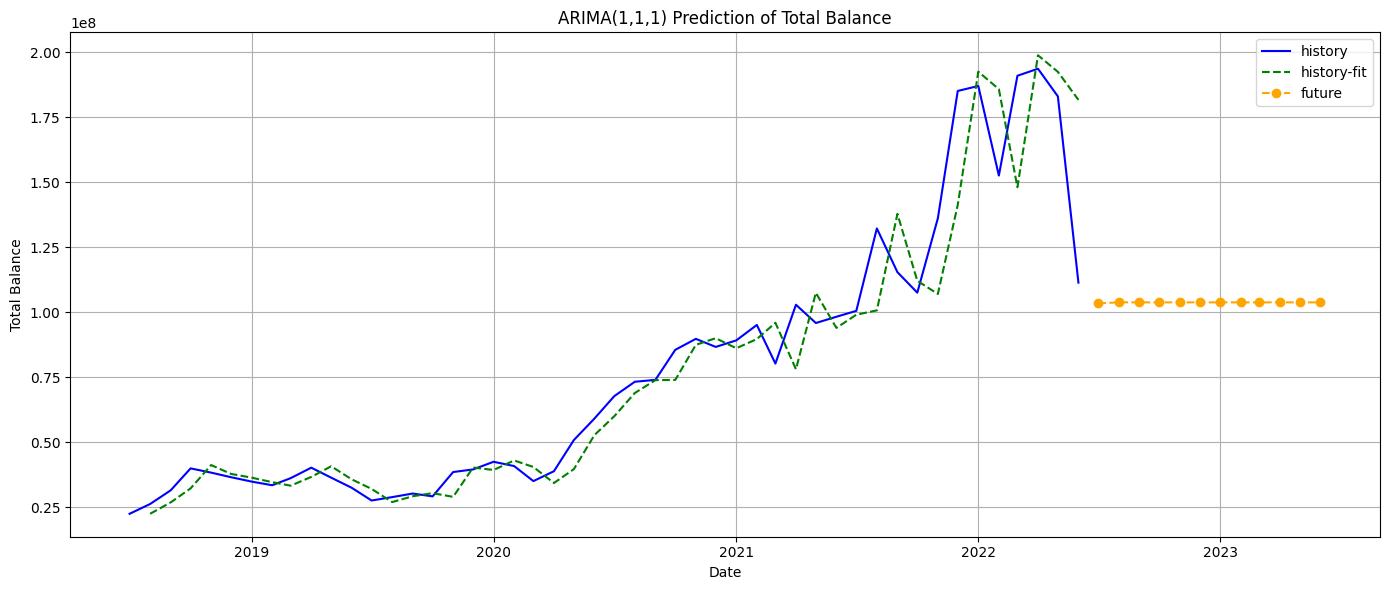

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


ts.index = pd.DatetimeIndex(ts.index, freq='MS')
ts['log_total_balance'] = np.log(ts['total_balance'])


model = ARIMA(ts['log_total_balance'], order=(1, 1, 1))
model_fit = model.fit()


pred_log = model_fit.predict(start=ts.index[1], end=ts.index[-1], typ='levels')
pred_total_balance = np.exp(pred_log)
pred_total_balance.name = 'fitted_total_balance'


forecast_result = model_fit.get_forecast(steps=12)
forecast_df = forecast_result.summary_frame(alpha=0.05)


forecast_log = forecast_df['mean']
forecast_total_balance = np.exp(forecast_log)
forecast_total_balance.name = 'forecast_total_balance'
forecast_total_balance.index = pd.date_range(start=ts.index[-1] + pd.DateOffset(months=1), periods=12, freq='MS')


result_df = pd.concat([
    ts['total_balance'],
    pred_total_balance,
    forecast_total_balance
], axis=1)

plt.figure(figsize=(14, 6))
plt.plot(result_df['total_balance'], label='history', color='blue')
plt.plot(result_df['fitted_total_balance'], label='history-fit', color='green', linestyle='--')
plt.plot(result_df['forecast_total_balance'], label='future', color='orange', linestyle='--', marker='o')
plt.title('ARIMA(1,1,1) Prediction of Total Balance')
plt.xlabel('Date')
plt.ylabel('Total Balance')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:
import pandas as pd
df = pd.read_excel('lstm.xlsx')
df.head()

,Date,GDPNOW,UNRATE,BOGZ1FL073161113Q,DFF,sales
0,2018-07-01,3.5537,3.8,2924.0,1.91,22497243.03
1,2018-08-01,NaN,3.8,NaN,1.91,26269264.06
2,2018-09-01,NaN,3.7,NaN,1.91,31518784.15
3,2018-10-01,1.8466,3.8,3041.0,2.18,39969147.05
4,2018-11-01,NaN,3.8,NaN,2.20,38335854.51


In [15]:
import numpy as np
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

torch.manual_seed(42)
np.random.seed(42)

df = pd.read_excel('lstm.xlsx')
df = df.fillna(method='ffill').fillna(method='bfill')
target_col = 'sales'

features = df.drop(columns=['Date']).values
target = df[[target_col]].values

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
features_scaled = scaler_x.fit_transform(features)
target_scaled = scaler_y.fit_transform(target)

data_scaled = np.hstack([features_scaled, target_scaled])

def create_sequences(data, input_len=12):
    X, y = [], []
    for i in range(len(data) - input_len):
        X.append(data[i:i+input_len, :-1])
        y.append(data[i+input_len, -1])
    return np.array(X), np.array(y)

sequence_length = 3
X_all, y_all = create_sequences(data_scaled, input_len=sequence_length)
print("X_all shape:", X_all.shape)
print("y_all shape:", y_all.shape)

X_all shape: (45, 3, 5)
y_all shape: (45,)


/tmp/ipython-input-2485173871.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill').fillna(method='bfill')


In [16]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, dropout=0.2):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers=num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out

param_grid = {
    'hidden_size': [32, 64],
    'num_layers': [1, 2],
    'lr': [0.001, 0.0005]
}


best_score = float('inf')
best_params = None


kf = KFold(n_splits=5, shuffle=True, random_state=42)


In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import torch

best_score = float('inf')
best_params = None

for hidden_size in param_grid['hidden_size']:
    for num_layers in param_grid['num_layers']:
        for lr in param_grid['lr']:
            rmse_list, mae_list, r2_list = [], [], []

            for fold, (train_idx, test_idx) in enumerate(kf.split(X_all)):
                X_train, X_test = X_all[train_idx], X_all[test_idx]
                y_train, y_test = y_all[train_idx], y_all[test_idx]


                X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
                y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
                X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
                y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)


                model = LSTMModel(X_all.shape[2], hidden_size, num_layers)
                criterion = nn.MSELoss()
                optimizer = torch.optim.Adam(model.parameters(), lr=lr)


                for epoch in range(100):
                    model.train()
                    optimizer.zero_grad()
                    output = model(X_train_tensor)
                    loss = criterion(output, y_train_tensor)
                    loss.backward()


                    torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

                    optimizer.step()


                model.eval()
                with torch.no_grad():
                    preds = model(X_test_tensor).numpy()
                    y_true = y_test_tensor.numpy()
                    y_pred = preds


                    y_true = scaler_y.inverse_transform(y_true)
                    y_pred = scaler_y.inverse_transform(y_pred)


                    if np.isnan(y_true).any() or np.isnan(y_pred).any():
                        print(f"⚠️ Fold {fold+1}  NaN，skip")
                        continue


                    mse = mean_squared_error(y_true, y_pred)
                    rmse = np.sqrt(mse)
                    mae = mean_absolute_error(y_true, y_pred)
                    r2 = r2_score(y_true, y_pred)

                    rmse_list.append(rmse)
                    mae_list.append(mae)
                    r2_list.append(r2)


            if len(rmse_list) < 3:
                print(f"⚠️ params {hidden_size}-{num_layers}-{lr} short，skip\n")
                continue

            avg_rmse = np.mean(rmse_list)
            avg_mae = np.mean(mae_list)
            avg_r2 = np.mean(r2_list)

            print(f"Params: hidden={hidden_size}, layers={num_layers}, lr={lr}")
            print(f"→ Avg RMSE: {avg_rmse:.2f}, MAE: {avg_mae:.2f}, R²: {avg_r2:.4f}\n")


            if avg_rmse < best_score:
                best_score = avg_rmse
                best_params = (hidden_size, num_layers, lr)

print("✅ Best params:", best_params)

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers

Params: hidden=32, layers=1, lr=0.001
→ Avg RMSE: 19981878.92, MAE: 14496008.20, R²: 0.8172



/usr/local/lib/python3.11/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers

Params: hidden=32, layers=1, lr=0.0005
→ Avg RMSE: 34430537.80, MAE: 27830850.80, R²: 0.4866

Params: hidden=32, layers=2, lr=0.001
→ Avg RMSE: 19606820.56, MAE: 13883351.60, R²: 0.8099

Params: hidden=32, layers=2, lr=0.0005
→ Avg RMSE: 34522031.98, MAE: 28382331.20, R²: 0.4831



/usr/local/lib/python3.11/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers

Params: hidden=64, layers=1, lr=0.001
→ Avg RMSE: 18997071.86, MAE: 12785424.20, R²: 0.8075



/usr/local/lib/python3.11/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers

Params: hidden=64, layers=1, lr=0.0005
→ Avg RMSE: 23382418.65, MAE: 18002247.60, R²: 0.7591

Params: hidden=64, layers=2, lr=0.001
→ Avg RMSE: 18723590.67, MAE: 12347901.00, R²: 0.8072

Params: hidden=64, layers=2, lr=0.0005
→ Avg RMSE: 21560351.68, MAE: 16112303.00, R²: 0.7826

✅ Best params: (64, 2, 0.001)


In [18]:
hidden_size = 64
num_layers = 2
lr = 0.001

X_tensor = torch.tensor(X_all, dtype=torch.float32)
y_tensor = torch.tensor(y_all, dtype=torch.float32).view(-1, 1)


model_final = LSTMModel(input_size=X_all.shape[2], hidden_size=hidden_size, num_layers=num_layers)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model_final.parameters(), lr=lr)

for epoch in range(150):
    model_final.train()
    optimizer.zero_grad()
    output = model_final(X_tensor)
    loss = criterion(output, y_tensor)
    loss.backward()

    torch.nn.utils.clip_grad_norm_(model_final.parameters(), max_norm=1.0)

    optimizer.step()
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.6f}")

print("✅ Final model trained on all data.")

Epoch 0, Loss: 0.146762
Epoch 10, Loss: 0.088892
Epoch 20, Loss: 0.074011
Epoch 30, Loss: 0.057373
Epoch 40, Loss: 0.034343
Epoch 50, Loss: 0.016912
Epoch 60, Loss: 0.014189
Epoch 70, Loss: 0.011247
Epoch 80, Loss: 0.010184
Epoch 90, Loss: 0.010629
Epoch 100, Loss: 0.010335
Epoch 110, Loss: 0.011636
Epoch 120, Loss: 0.009931
Epoch 130, Loss: 0.009856
Epoch 140, Loss: 0.008725
✅ Final model trained on all data.


In [19]:
features = df.drop(columns=['Date', 'sales']).columns
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

n_forecast = 12
future_feature_preds = pd.DataFrame()

non_sales_features = df.columns.drop(['Date', 'sales'])

for col in non_sales_features:
    series = df[col].dropna().values
    try:
        model = ARIMA(series, order=(1, 0, 1)).fit()
        forecast = model.forecast(steps=n_forecast)
        future_feature_preds[col] = forecast
    except Exception as e:
        print(f"❌ feature {col} ARMA fail: {e}")
        future_feature_preds[col] = [series[-1]] * n_forecast

print("✅ feature pred over")

✅ feature pred over


In [20]:
future_feature_preds

,GDPNOW,UNRATE,BOGZ1FL073161113Q,DFF
0,0.681237,3.943139,2890.676533,0.870795
1,1.839334,4.248291,2848.894479,0.883689
2,2.332033,4.470418,2808.712962,0.896022
3,2.541645,4.632110,2770.070672,0.907819
4,2.630822,4.749810,2732.908646,0.919104
5,2.668762,4.835486,2697.170179,0.929899
6,2.684902,4.897852,2662.800739,0.940224
7,2.691769,4.943250,2629.747884,0.950101
8,2.694691,4.976296,2597.961179,0.959549
9,2.695934,5.000352,2567.392122,0.968587


In [21]:
from sklearn.preprocessing import MinMaxScaler

feature_cols = ['GDPNOW', 'UNRATE', 'BOGZ1FL073161113Q', 'DFF']
features_only = df[feature_cols].values

scaler_features_only = MinMaxScaler()
scaler_features_only.fit(features_only)

future_features_scaled = scaler_features_only.transform(future_feature_preds.values)

pd.DataFrame(future_features_scaled, columns=feature_cols).head()

,GDPNOW,UNRATE,BOGZ1FL073161113Q,DFF
0,0.474485,0.039216,0.937103,0.341998
1,0.491255,0.066220,0.919621,0.347370
2,0.498390,0.085878,0.902809,0.352509
3,0.501426,0.100187,0.886640,0.357425
4,0.502717,0.110603,0.871091,0.362127


In [22]:
cur_seq = X_all[-1].copy()
n_forecast = 12
future_preds_scaled = []

model_final.eval()
with torch.no_grad():
    for i in range(n_forecast):
        current_features = future_features_scaled[i]


        last_sales_scaled = cur_seq[-1, -1]


        input_row = np.append(current_features, last_sales_scaled).reshape(1, -1)


        new_seq = np.vstack((cur_seq[1:], input_row))


        input_tensor = torch.tensor(new_seq.reshape(1, new_seq.shape[0], new_seq.shape[1]), dtype=torch.float32)
        pred_scaled = model_final(input_tensor).numpy().flatten()[0]


        future_preds_scaled.append(pred_scaled)

        input_row[0, -1] = pred_scaled
        cur_seq = np.vstack((cur_seq[1:], input_row))


future_preds = scaler_y.inverse_transform(np.array(future_preds_scaled).reshape(-1, 1)).flatten()

print("\n future sales：")
for i, val in enumerate(future_preds, 1):
    print(f"Month +{i}: {val:.2f}")


 future sales：
Month +1: 154805744.00
Month +2: 132053864.00
Month +3: 104701400.00
Month +4: 91029696.00
Month +5: 81278336.00
Month +6: 75820360.00
Month +7: 72357776.00
Month +8: 70246304.00
Month +9: 68859816.00
Month +10: 67917048.00
Month +11: 67233496.00
Month +12: 66711704.00


In [23]:
forecast_df = pd.DataFrame({
    "Month": [f"Month +{i+1}" for i in range(len(future_preds))],
    "Predicted_Sales": future_preds
})

forecast_df.to_csv("future_sales_forecast.csv", index=False)

from google.colab import files
files.download("future_sales_forecast.csv")

print("future_sales_forecast.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

future_sales_forecast.csv


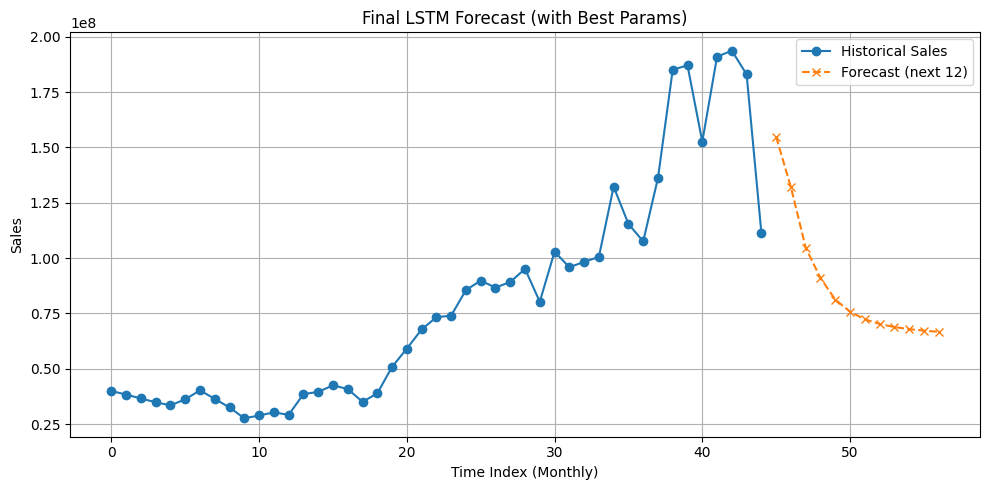

In [24]:
import matplotlib.pyplot as plt

historical_sales = scaler_y.inverse_transform(y_all.reshape(-1, 1)).flatten()

all_sales = np.concatenate([historical_sales, future_preds.flatten()])


plt.figure(figsize=(10, 5))


plt.plot(range(len(historical_sales)), historical_sales, label='Historical Sales', marker='o')

plt.plot(
    range(len(historical_sales), len(all_sales)),
    future_preds.flatten(),
    label='Forecast (next 12)',
    marker='x',
    linestyle='--'
)

plt.title("Final LSTM Forecast (with Best Params)")
plt.xlabel("Time Index (Monthly)")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

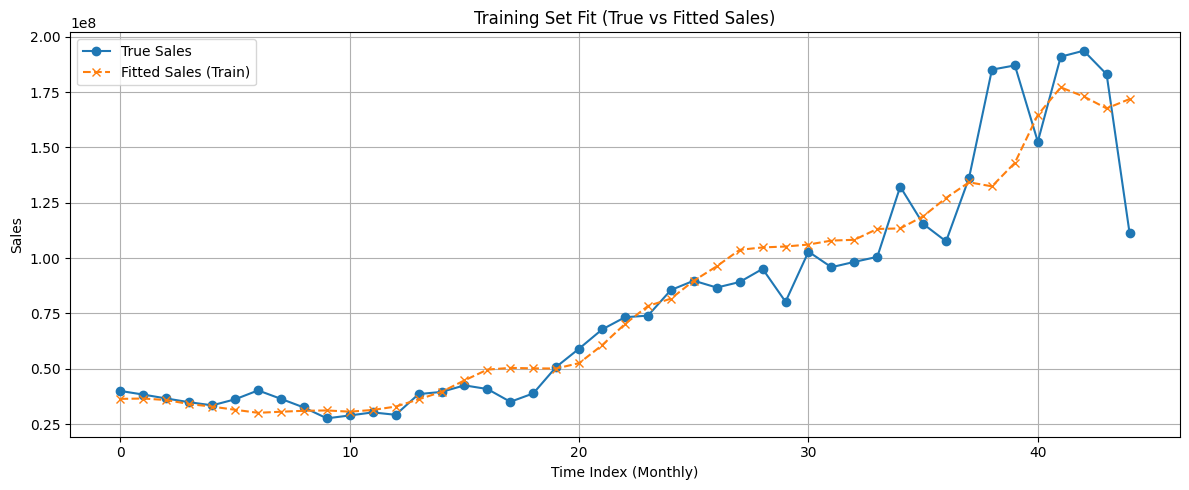

In [ ]:
import matplotlib.pyplot as plt


model_final.eval()
with torch.no_grad():
    y_train_pred_scaled = model_final(torch.tensor(X_all, dtype=torch.float32)).numpy()


y_train_true = scaler_y.inverse_transform(y_all.reshape(-1, 1)).flatten()
y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()


plt.figure(figsize=(12, 5))
plt.plot(range(len(y_train_true)), y_train_true, label='True Sales', marker='o')
plt.plot(range(len(y_train_pred)), y_train_pred, label='Fitted Sales (Train)', marker='x', linestyle='--')

plt.title("Training Set Fit (True vs Fitted Sales)")
plt.xlabel("Time Index (Monthly)")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

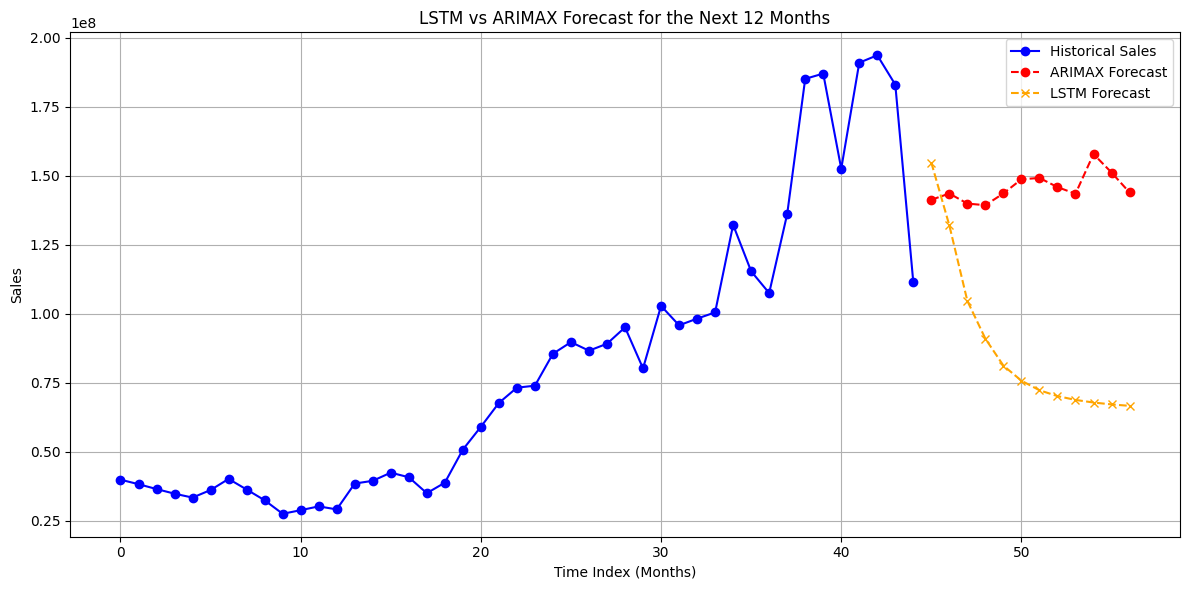

In [25]:
import matplotlib.pyplot as plt

history_len = len(historical_sales)
future_index = list(range(history_len, history_len + 12))


plt.figure(figsize=(12, 6))


plt.plot(range(history_len), historical_sales, label="Historical Sales", color="blue", marker='o')

plt.plot(future_index, forecast_mean.values, label="ARIMAX Forecast", linestyle='--', marker='o', color='red')

plt.plot(future_index, future_preds, label="LSTM Forecast", linestyle='--', marker='x', color='orange')

plt.title("LSTM vs ARIMAX Forecast for the Next 12 Months")
plt.xlabel("Time Index (Months)")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()